<a href="https://colab.research.google.com/github/Shashwat-143/Exploratory-Data-Analysis-on-Dataset---Terrorism/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Dataset - Terrorism**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

In [47]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134324,201407040065,2014,7,4,NaN,0,NaN,153,Pakistan,6,...,Casualty numbers for this attack conflict acro...,"""Pakistan: Nationalist group wanted to target ...","""'Mishandled' explosion: Suspects killed in Sa...","""NATIONAL - Karachi blast outside mosque kills...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
134325,201407040066,2014,7,4,NaN,0,NaN,153,Pakistan,6,...,Police officials stated that the attack was re...,"""Third bomb attack on courier firm in two week...","""Another attack: Fifth blast at courier office...","""Two killed, three injured in Karachi blast,"" ...",START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
134326,201407040067,2014,7,4,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Afghanistan: Suicide Bomber Detonates in Hera...","""Blast kills would-be suicide attacker inside ...",NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
134327,201407040068,2014,7,4,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Bomber attacks ISAF vehicle in Kandahar,"" Afg...","""Suicide bomber attacks ISAF troops in Kandaha...",NaN,START Primary Collection,0.0,1.0,1.0,1.0,NaN


In [48]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [49]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [53]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [54]:
data

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134324,2014,7,4,Pakistan,Sindh,South Asia,Karachi,24.891115,67.143311,Bombing/Explosion,2.0,2.0,Chief: Hafiz Muhammad Saeed,07/04/2014: An explosive device detonated when...,Sindhu Desh Liberation Army (SDLA),Terrorists/Non-State Militia,Explosives,NaN
134325,2014,7,4,Pakistan,Sindh,South Asia,KArachi,24.891115,67.143311,Bombing/Explosion,0.0,0.0,Office,07/04/2014: An explosive device detonated in f...,Unknown,Business,Explosives,NaN
134326,2014,7,4,Afghanistan,Herat,South Asia,Herat,34.346722,62.197315,Bombing/Explosion,1.0,0.0,Mosque,07/04/2014: A suicide bomber detonated an expl...,Unknown,Religious Figures/Institutions,Explosives,NaN
134327,2014,7,4,Afghanistan,Kandahar,South Asia,Zhari district,31.578184,65.411654,Bombing/Explosion,1.0,0.0,Vehicle,07/04/2014: A suicide bomber in an explosives-...,Taliban,Military,Explosives,NaN


In [55]:
data.shape

(134329, 18)

In [57]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           419
Region            0
City            434
latitude       4288
longitude      4289
Attacktype        0
kill           7589
Wound         11759
target1         636
summary       66129
Group             0
Targettype        0
Weapon            1
motive        90592
dtype: int64

In [58]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [59]:
data['Casualities'] = data['kill'] + data['Wound']

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134329 entries, 0 to 134328
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         134329 non-null  int64  
 1   Month        134329 non-null  int64  
 2   day          134329 non-null  int64  
 3   Country      134329 non-null  object 
 4   State        133910 non-null  object 
 5   Region       134329 non-null  object 
 6   City         133895 non-null  object 
 7   latitude     130041 non-null  float64
 8   longitude    130040 non-null  float64
 9   Attacktype   134329 non-null  object 
 10  kill         134329 non-null  float64
 11  Wound        134329 non-null  float64
 12  target1      133693 non-null  object 
 13  summary      68200 non-null   object 
 14  Group        134329 non-null  object 
 15  Targettype   134329 non-null  object 
 16  Weapon       134328 non-null  object 
 17  motive       43737 non-null   object 
 18  Casualities  134329 non-

In [61]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,134329.000000,134329.000000,134329.000000,130041.000000,1.300400e+05,134329.000000,134329.000000,134329.000000
mean,1998.076179,6.339904,15.396891,22.539541,-6.430552e+02,2.155179,2.945380,5.100559
std,12.552582,3.382599,8.824650,19.999607,2.390000e+05,11.298662,39.165073,45.801786
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1988.000000,3.000000,8.000000,8.980118,-6.245485e+00,0.000000,0.000000,0.000000
50%,1997.000000,6.000000,15.000000,30.733315,3.561305e+01,0.000000,0.000000,1.000000
75%,2011.000000,9.000000,23.000000,35.079406,6.821800e+01,1.000000,1.000000,4.000000
max,2014.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


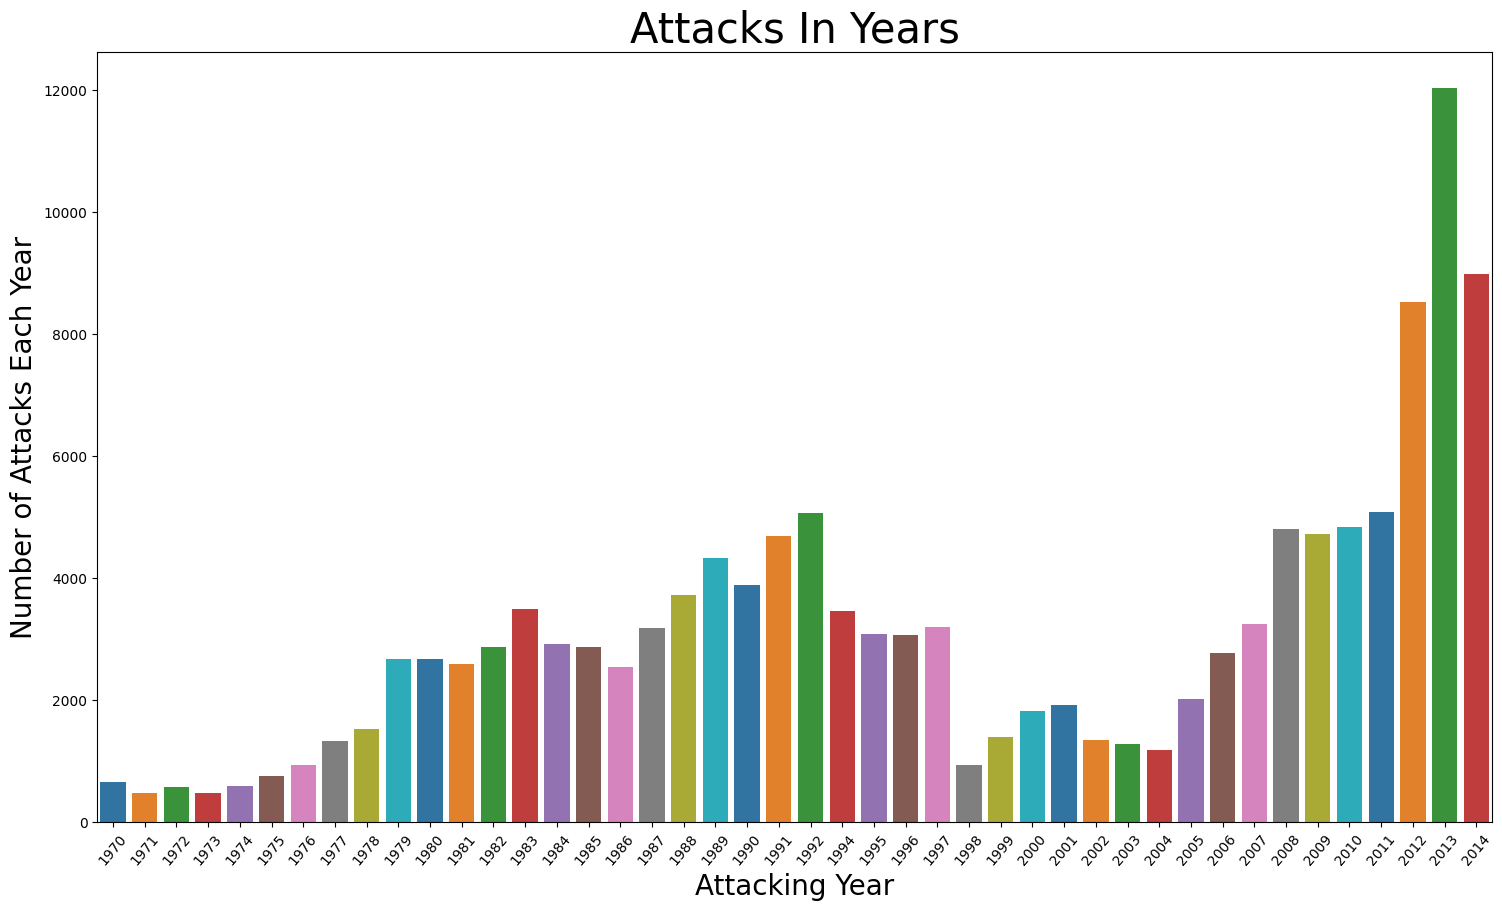

In [62]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

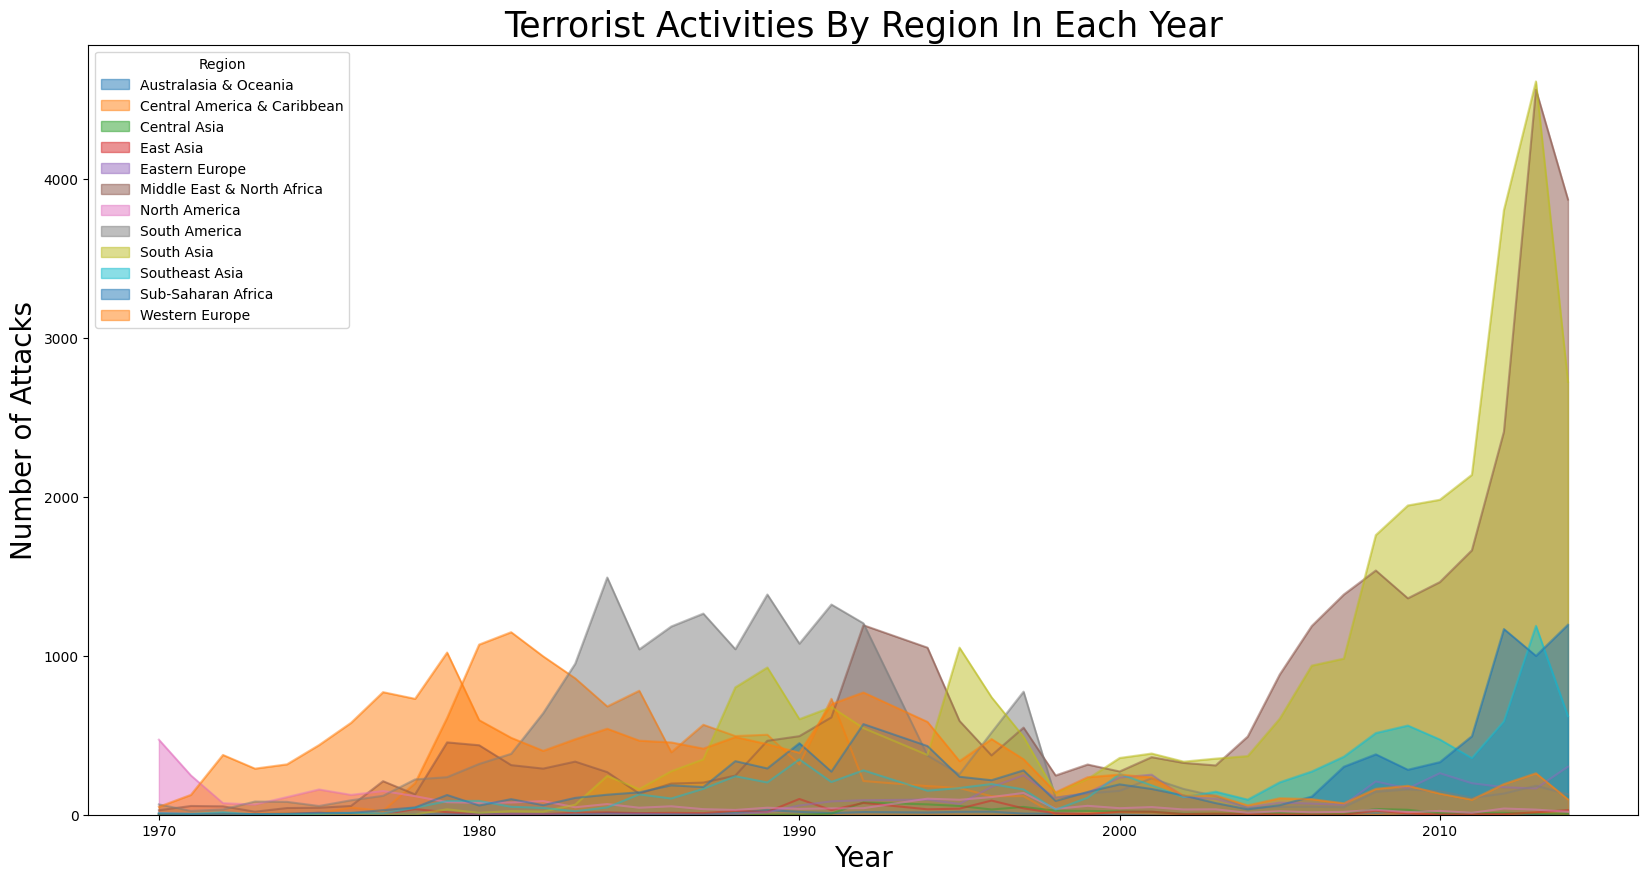

In [63]:
pd.crosstab(data.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [64]:
attack = data.Country.value_counts()[:10]
attack

Iraq              14585
Pakistan          10599
India              8709
Colombia           7821
Afghanistan        6869
Peru               6070
El Salvador        5320
United Kingdom     4842
Philippines        4548
Spain              3237
Name: Country, dtype: int64

In [65]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4539
Taliban                                             3734
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2307
Basque Fatherland and Freedom (ETA)                 2024
New People's Army (NPA)                             1760
Liberation Tigers of Tamil Eelam (LTTE)             1606
Communist Party of India - Maoist (CPI-Maoist)      1556
Name: Group, dtype: int64

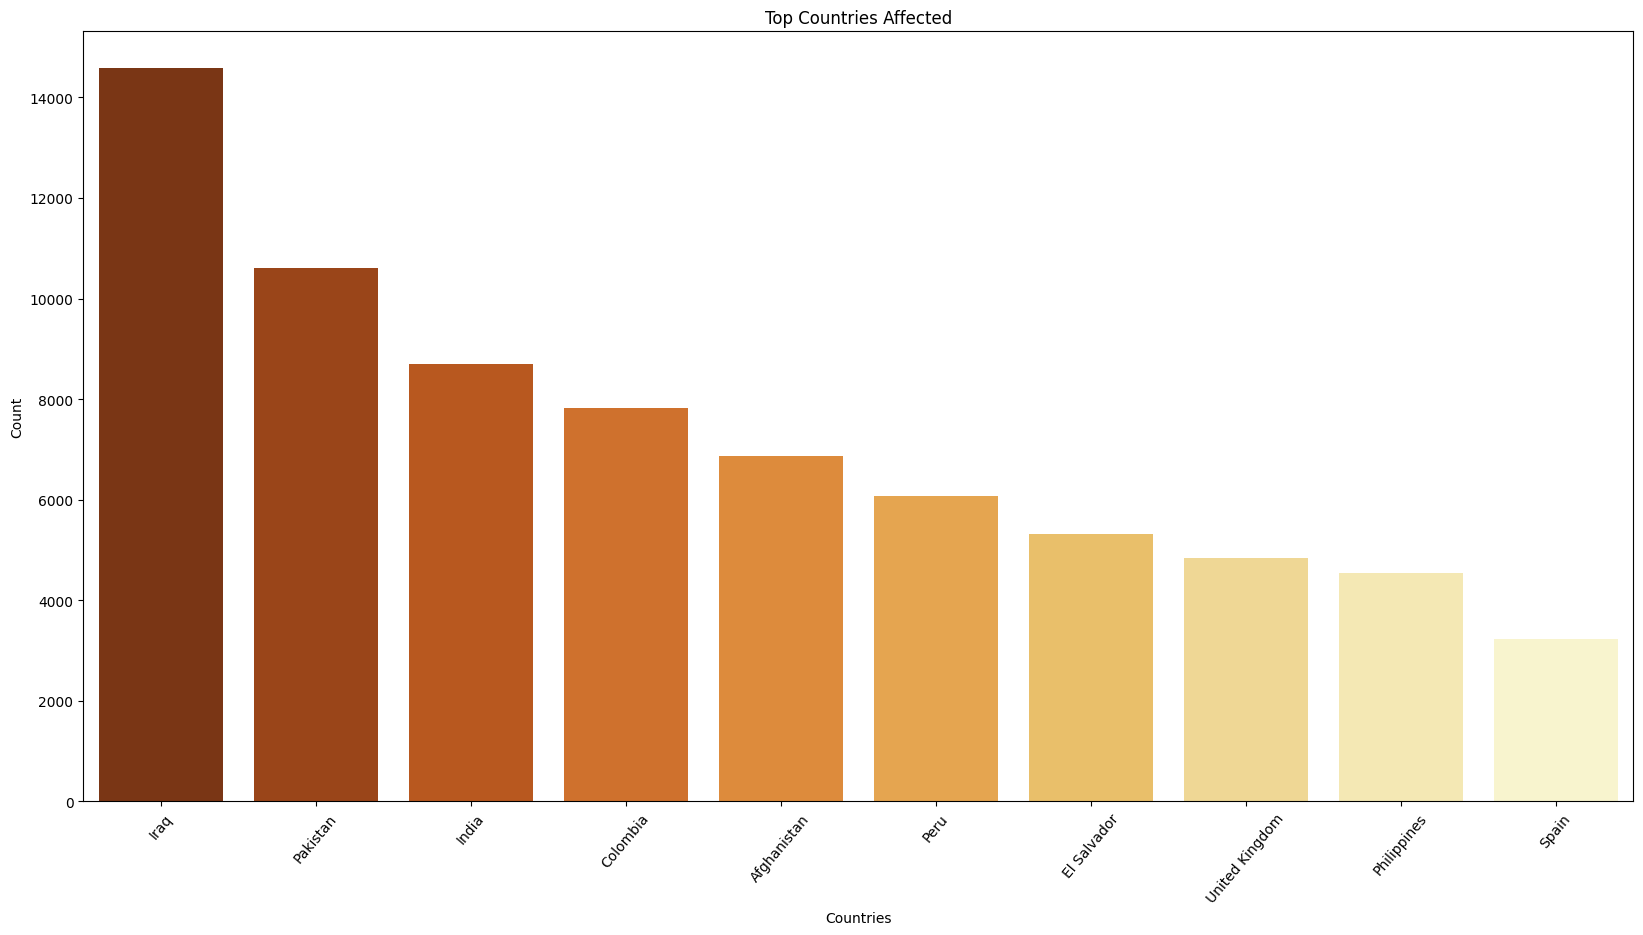

In [66]:
plt.subplots(figsize=(20,10))
sns.barplot(x=data['Country'].value_counts()[:10].index, y=data['Country'].value_counts()[:10].values, palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

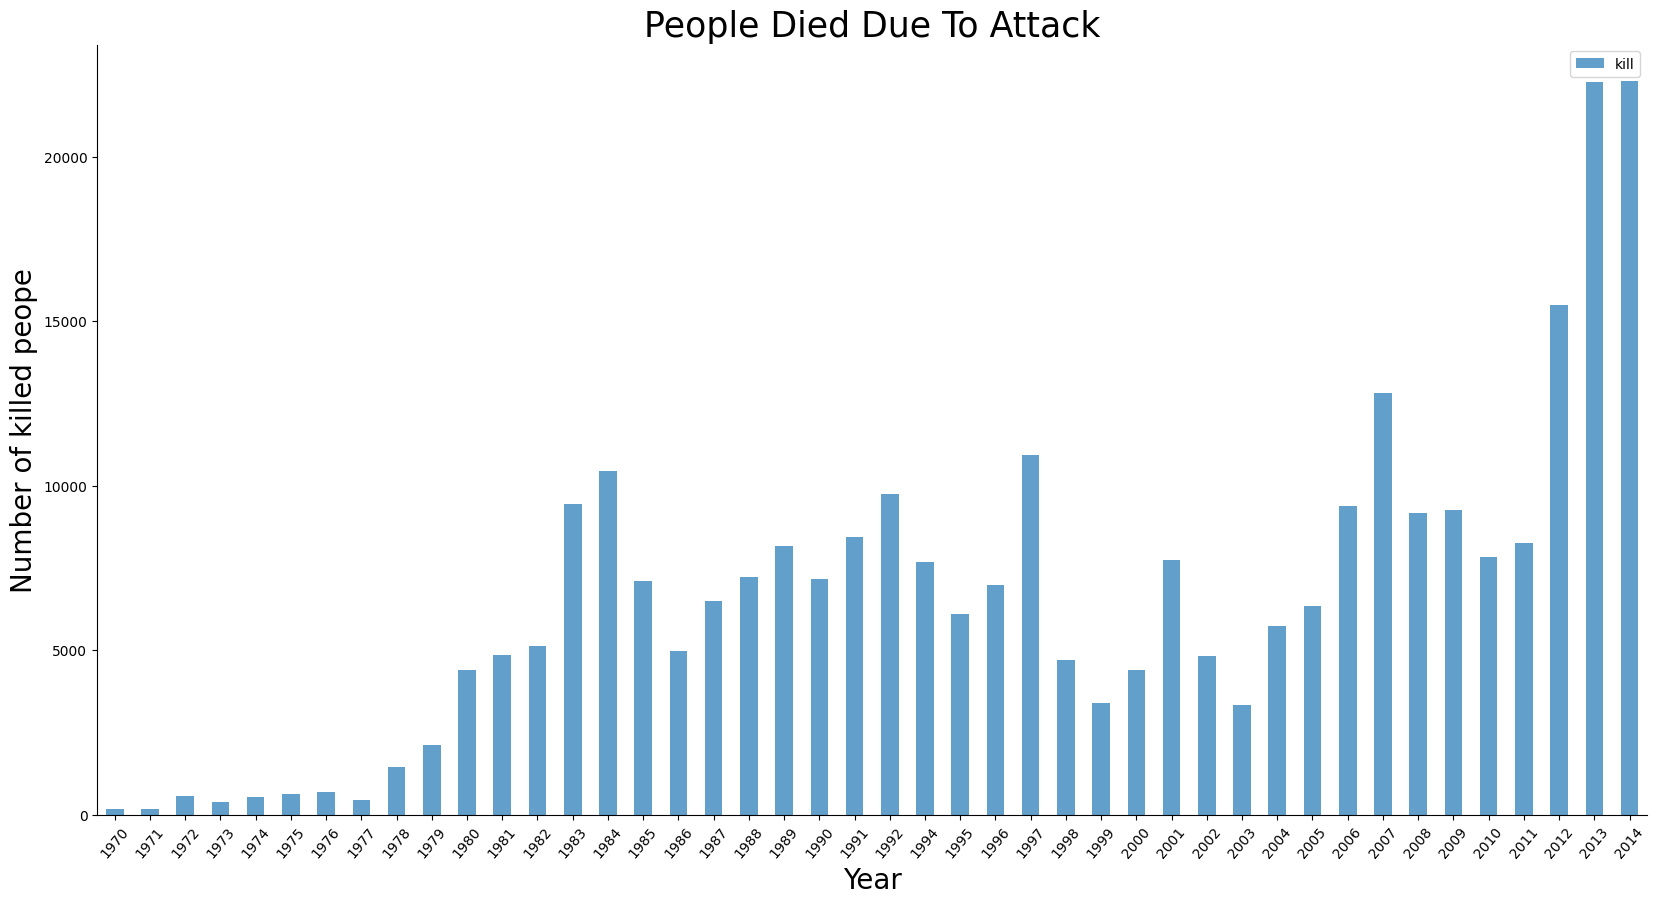

In [67]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

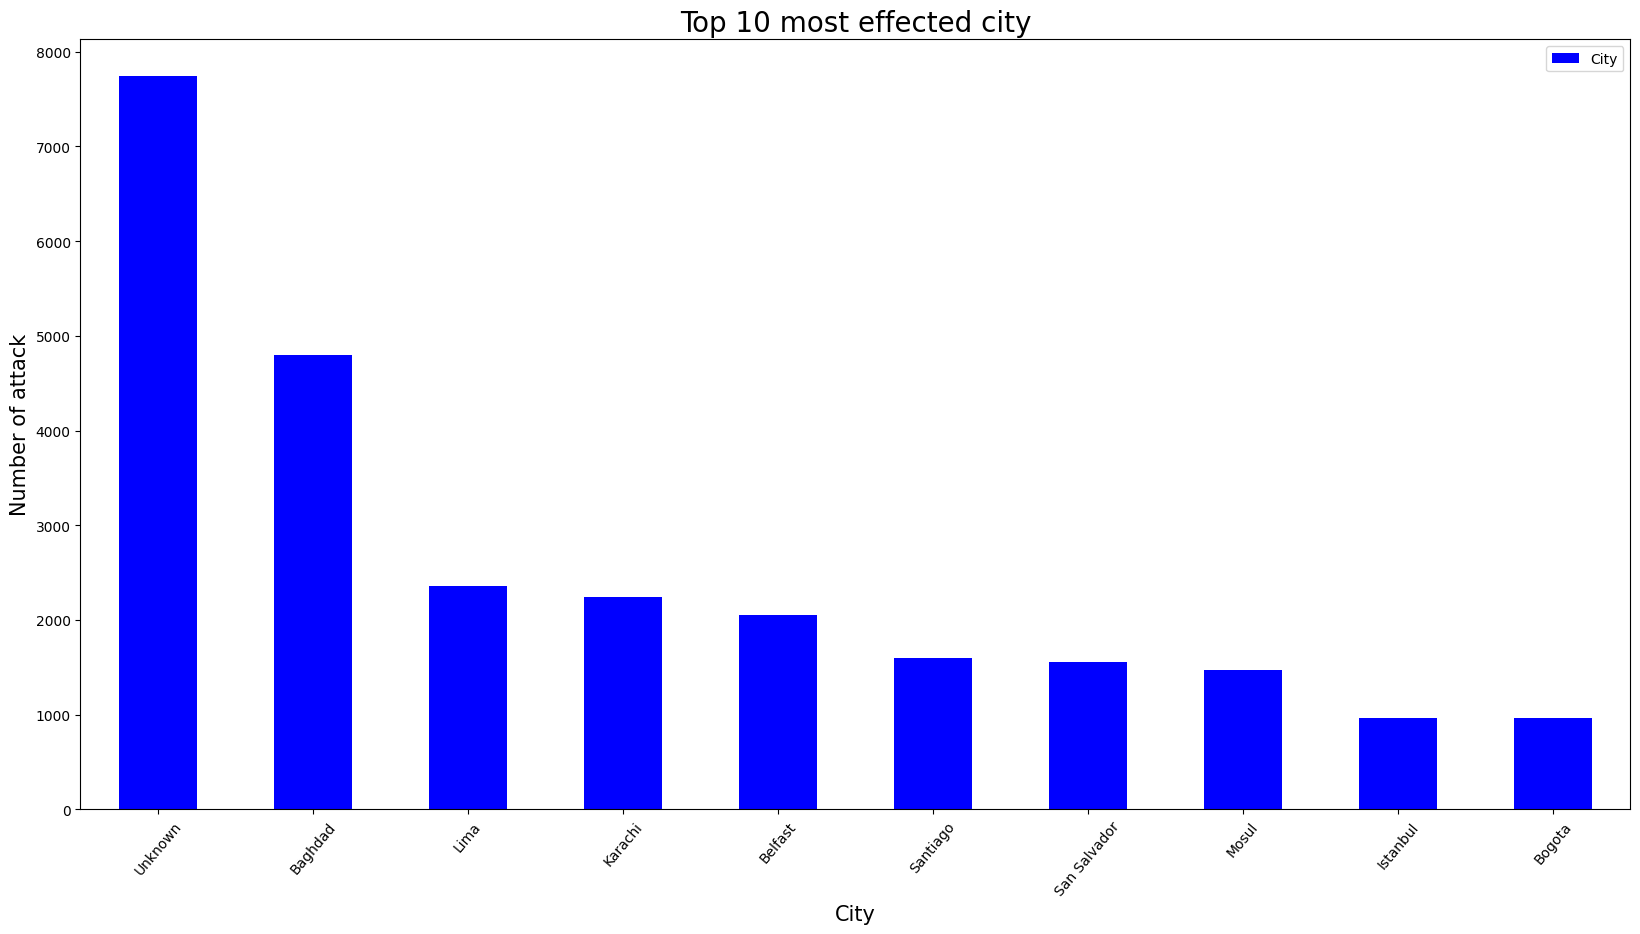

In [68]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

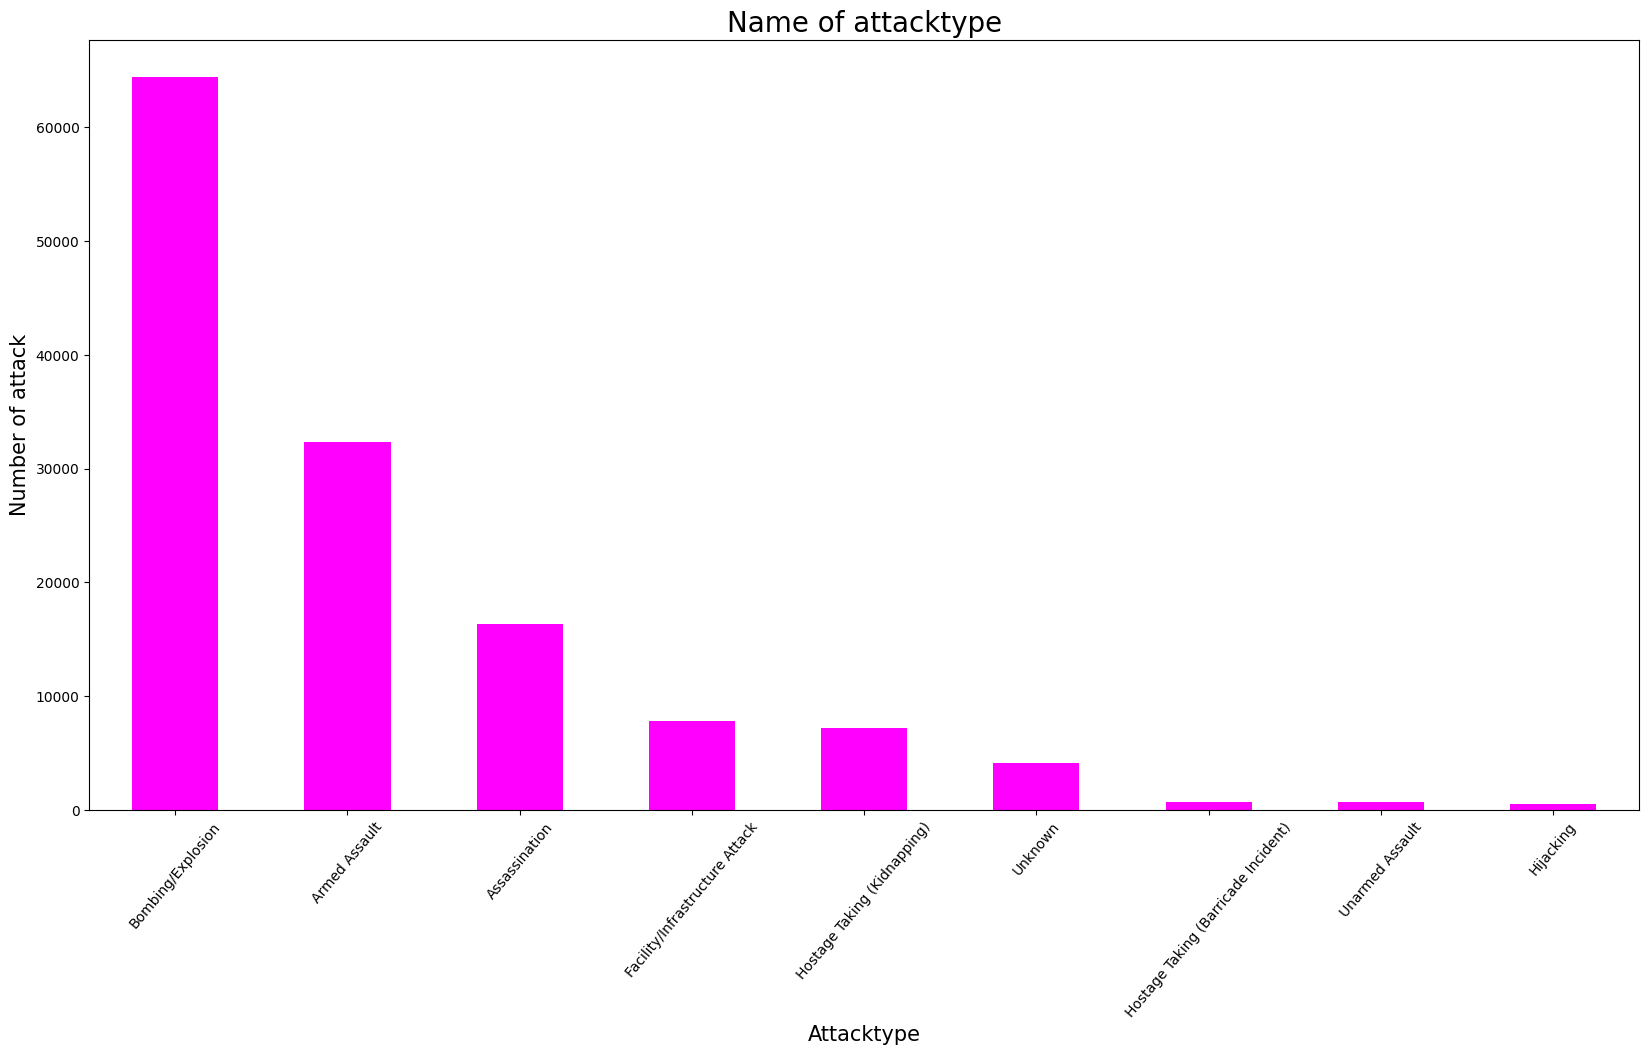

In [69]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

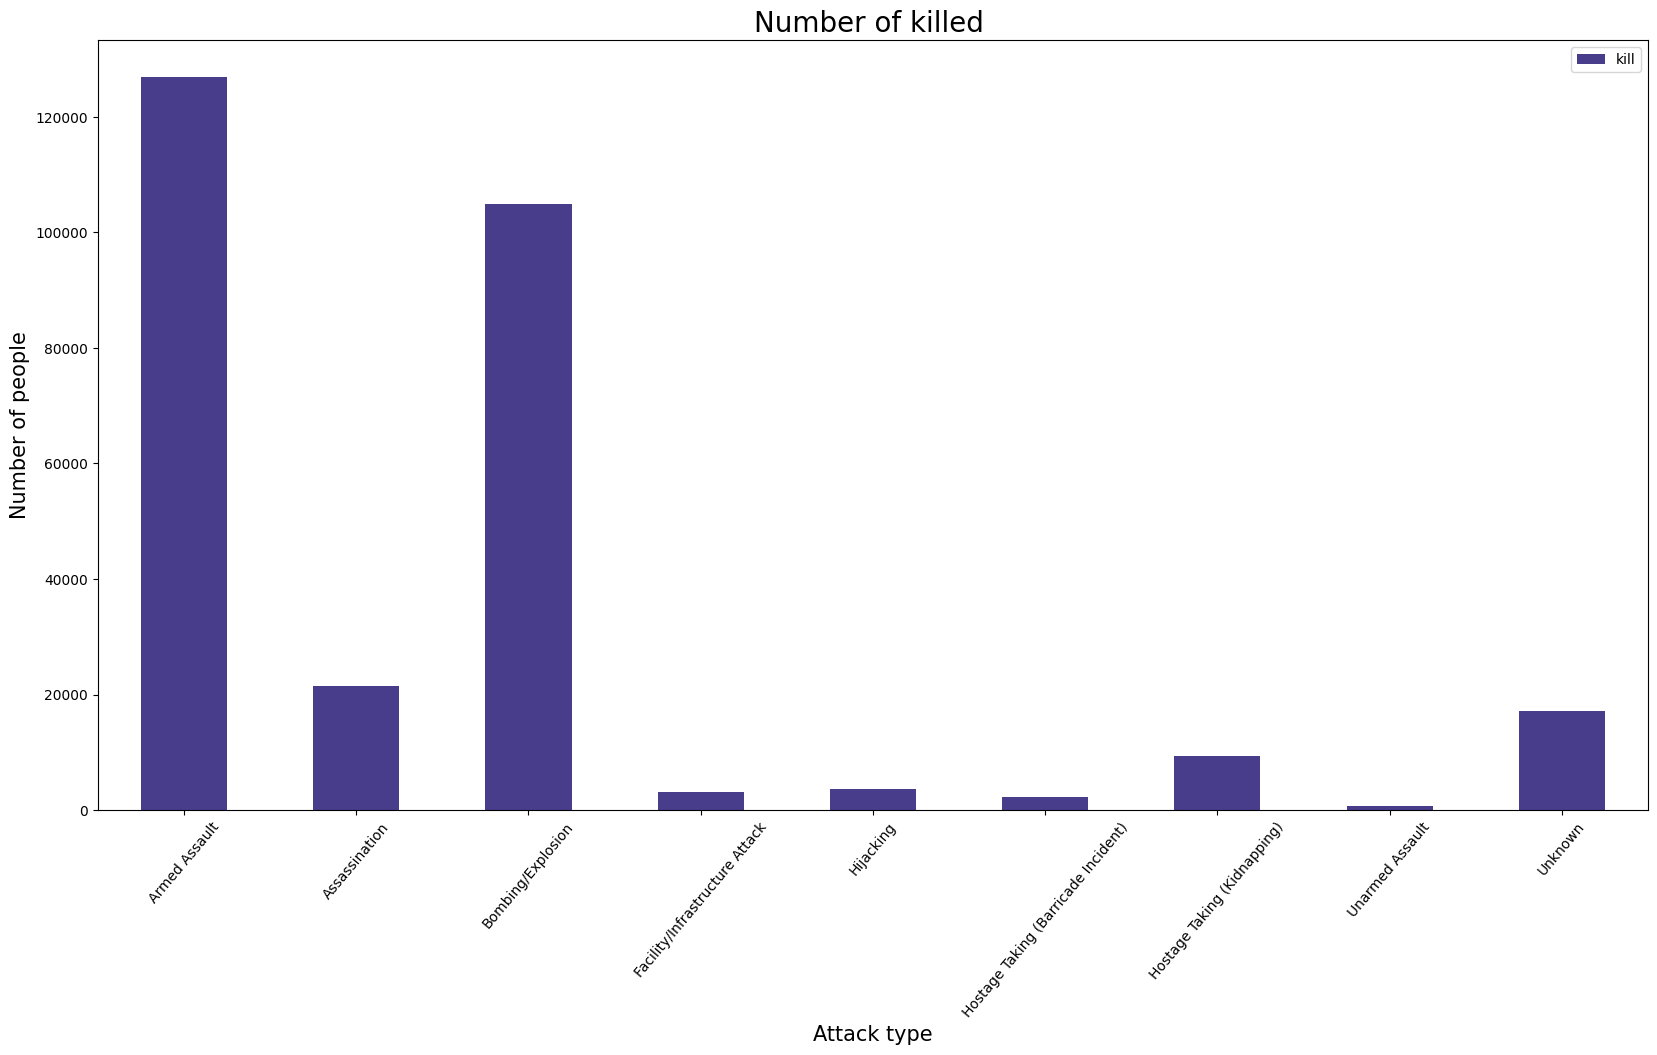

In [70]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

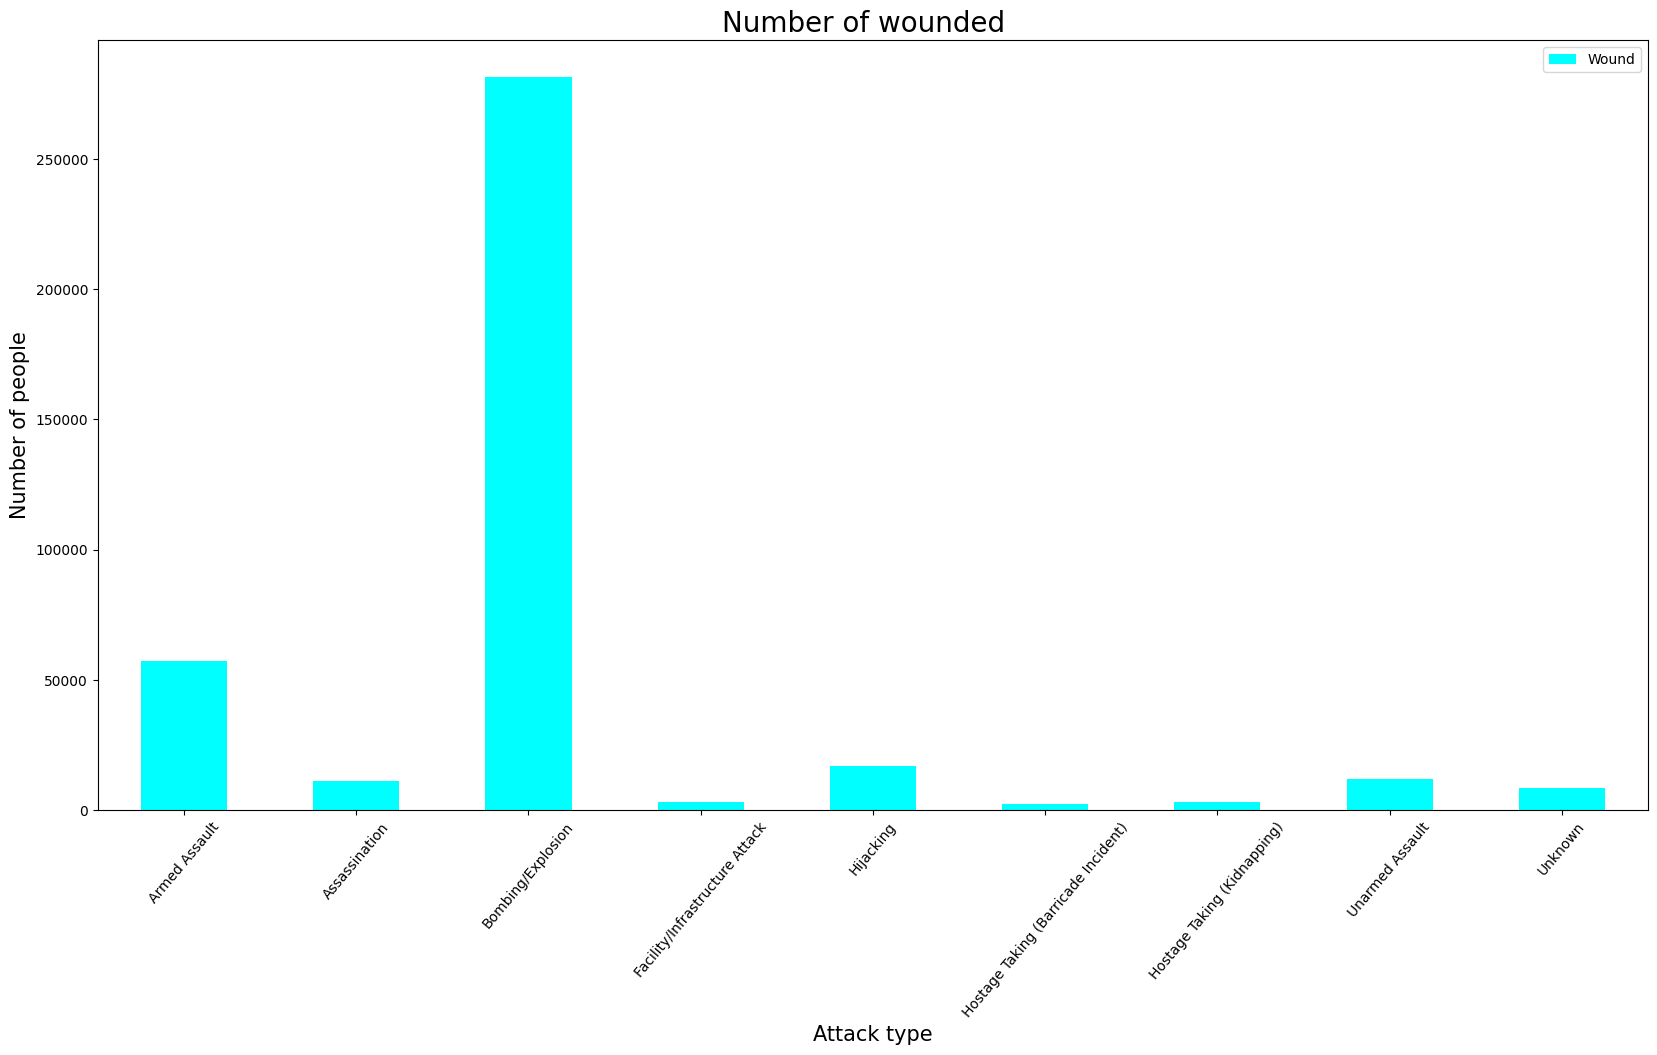

In [71]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

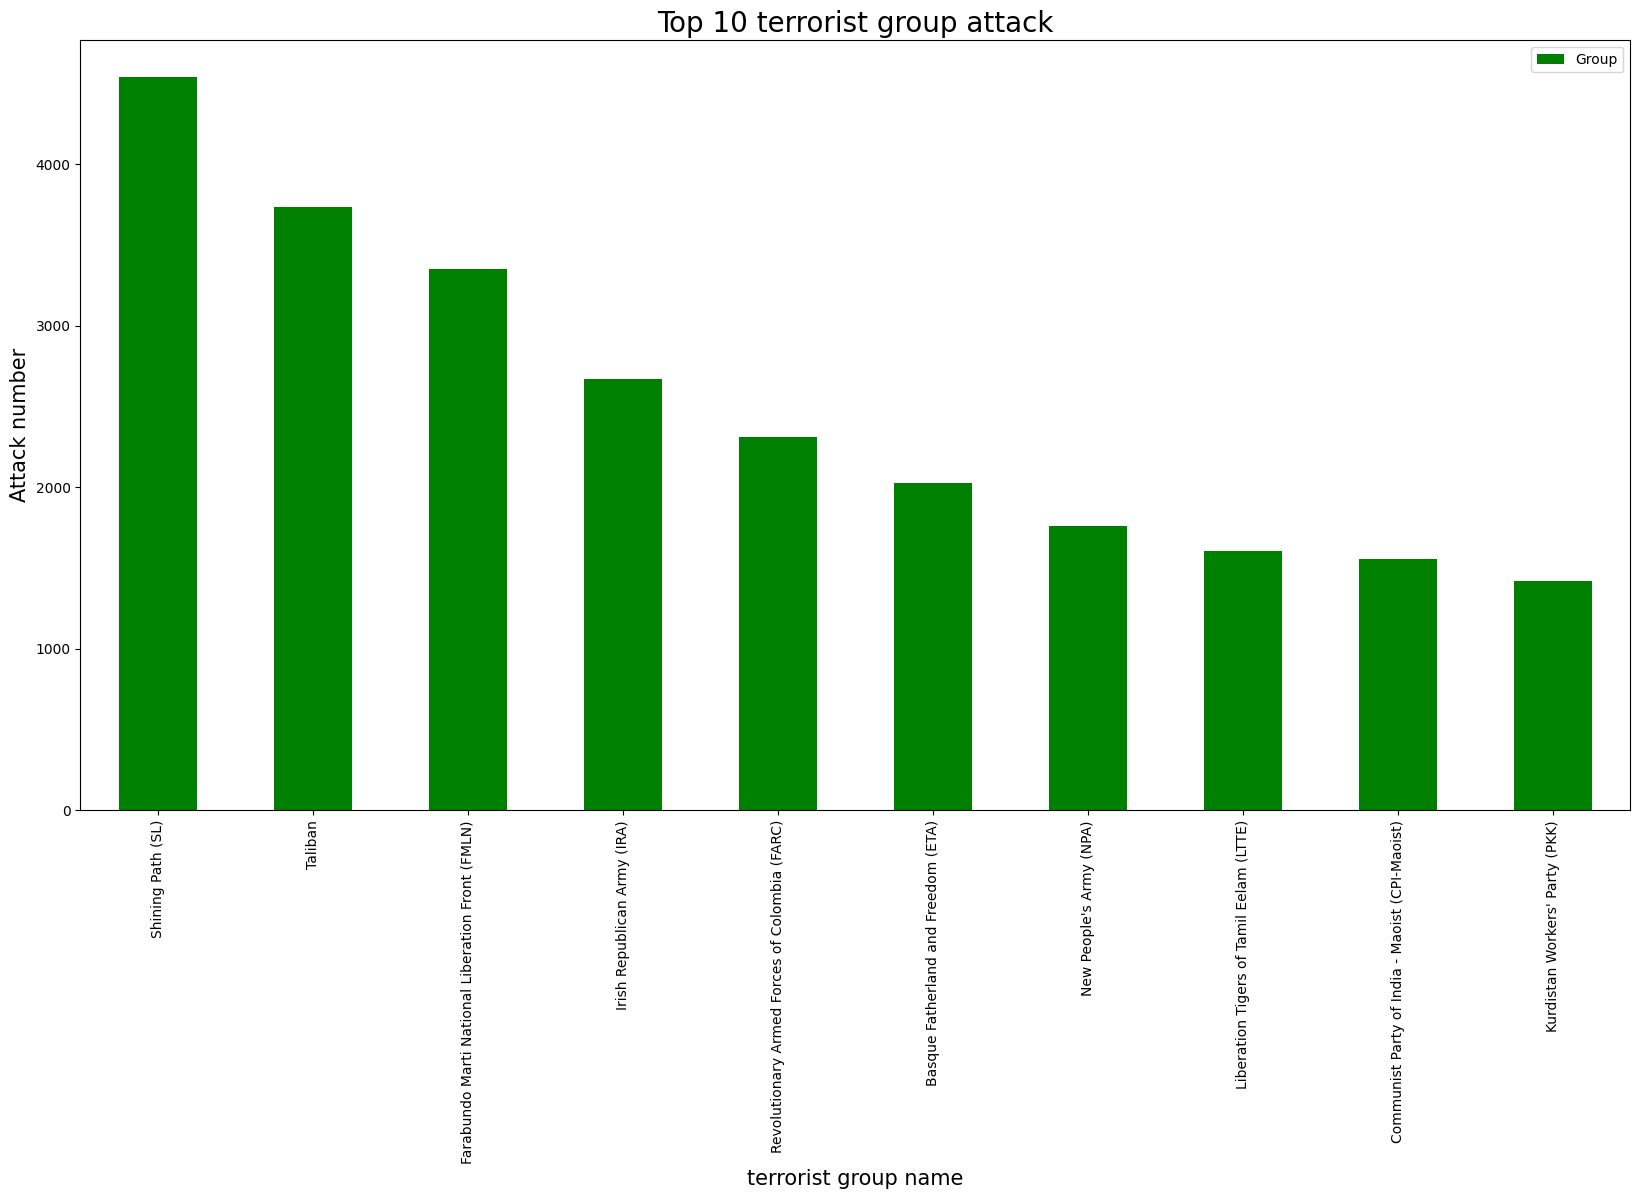

In [74]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

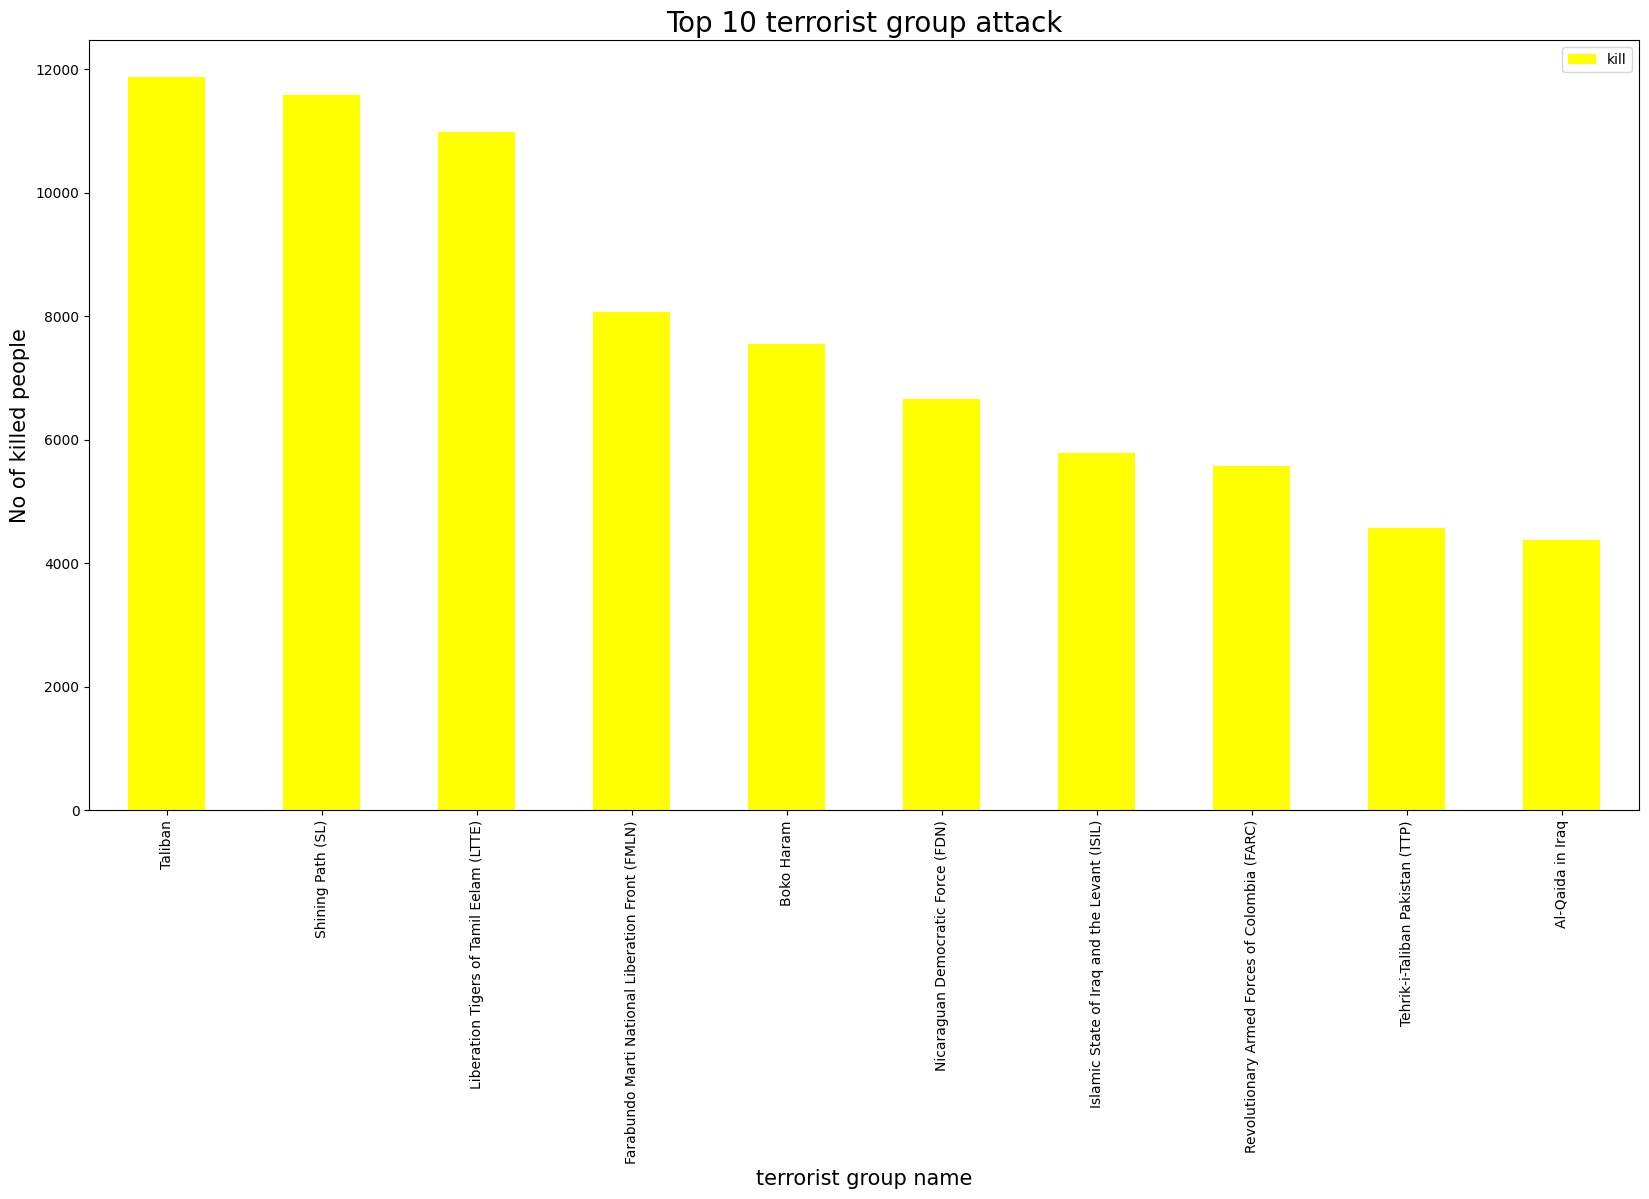

In [75]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [76]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Taliban,Afghanistan,11745.0
1,Shining Path (SL),Peru,11575.0
2,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
3,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
4,Boko Haram,Nigeria,7548.0
5,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,5551.0
7,Islamic State of Iraq and the Levant (ISIL),Iraq,5452.0
8,Tehrik-i-Taliban Pakistan (TTP),Pakistan,4561.0
9,Al-Qaida in Iraq,Iraq,4273.0


In [77]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 289503


In [78]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill


Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,126933.0,21484.0,104842.0,3048.0,3603.0,2326.0,9389.0,727.0,17151.0


In [79]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,17864.0,41.0,11009.0,0.0,3036.0,0.0,490.0,31.0,13.0,28.0,...,1.0,0.0,1188.0,97.0,1.0,3373.0,119.0,324.0,70.0,154.0
